<a href="https://colab.research.google.com/github/rafael-ariascalles/MachineLearningExamples/blob/main/Liability_Customer_Buying_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Objective

Predict the likelihood of a liability customer buying personal loans

## Libraries

In [203]:
import pandas as pd
import numpy as np
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [172]:
#Pandas format for decimals
pd.options.display.float_format = "{:,.2f}".format
#Display of the ipynb 
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

## Data Understanding

Attribute Information:
* ID: Customer ID 
* Age NUM: Customer's age in completed years
* Experience NUM: #years of professional experience
* Income NUM: Annual income of the customer K
* ZIP Code CATE: Home Address ZIP
* Family CATE: Family size of the customer
* CCAvg NUM: Avg. spending on credit cards per month k
* Education CATE: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage NUM: Value of house mortgage if any. k
* Personal Loan TARGET: Did this customer accept the personal loan offered in the last campaign?
* Securities Account BOOL: Does the customer have a securities account with the bank?
* CD Account BOOL: Does the customer have a certificate of deposit (CD) account with the bank?
* Online BOOL: Does the customer use internet banking facilities?
* Credit card BOOL: Does the customer use a credit card issued by the bank?

In [3]:
data = pd.read_csv("drive/MyDrive/PGP-AIML/Bank_Personal_Loan_Modelling.csv")

Columns names normalize to lower and replace space with underscore

In [4]:
data.columns = [s.lower().replace(" ","_") for s in data.columns]

In [5]:
data.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [7]:
data.shape

(5000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
data.describe()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Different preprocessing will be use for ZIP Code, Family, Education. These variable represent a Discrite information or a category information.

ID will be drop.

With Expirience feature it will be "Clip" to have a range between 1 to Max, rigth now we have -3 as minimun. we are going to transform every number less than 1 in 1 .

Age, Income, CCavg and  Mortgage will be use as is. only that it will be generated a Flag if the Mortgage column is 0, indicating if the customer has a Mortage.

For binary variables it will be use as is.

the Number 1 in Family,Education will be the base class of the model. 

For the ZIP Code, it will be take the first 2 digits and create dummy variable. and it only be use the top 4 Zip codes and then the base class will be the rest of the Zip Code

# Data Exploration (EDA)

#### Unique values in the dataset

In [10]:
print("Unique values:")
data.nunique()

Unique values:


id                    5000
age                     45
experience              47
income                 162
zip_code               467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
creditcard               2
dtype: int64

In [11]:
data["zip_code"].apply(lambda x: str(x)[:2]).nunique()

7

As the ZIP code is a Categorical Variable given that it doesnt have a Numeric interpretation, it would be group in ZIP codes of 2 digits to have a category. in that way we will be only using 7 Codes for location

In [12]:
data["zip_code"].apply(lambda x: str(x)[:2]).value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: zip_code, dtype: int64

#### Histogram of Variables

In [13]:
#Variable Creation
data["zip2d"] = data["zip_code"].apply(lambda x: str(x)[:2])

In [14]:
n = len(data.columns)

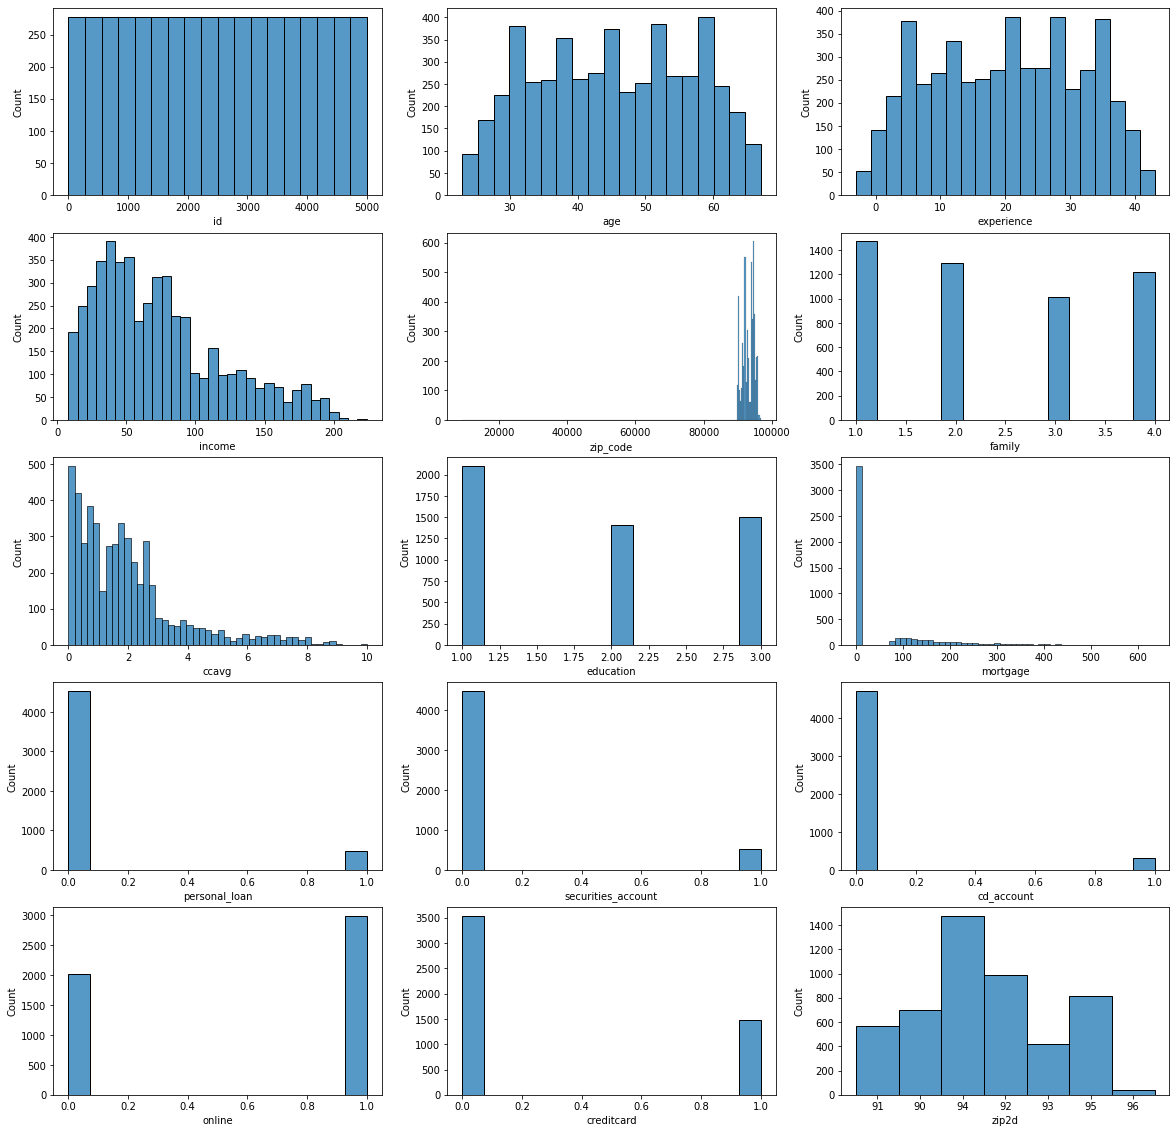

In [15]:
fig, axs = plt.subplots(n//3,3,figsize=(20,20))
axs = axs.flatten()
for c,ax in zip(data,axs):
  #for categorical it should be use Countplot bust Hist give the result for the analysis 
  sns.histplot(data[c],ax=ax)
plt.show()

As show above, the variables CreditCard, Online, CD ACCount, Securities Account, Education , Family and ZIP2D will be use as Categorical Variables. also the variable got_mortgage would be created to have the different bewteen customer with and without mortgage. In other words. the categorical variables would be all the variables with less than 7 unique values . ID it wont be use

In [16]:
data.drop(["id","zip_code"],axis=1,inplace=True)

As we have some categorical variables, it will be use a PairPlot with KDE given that we would see concentration when is Categorical.

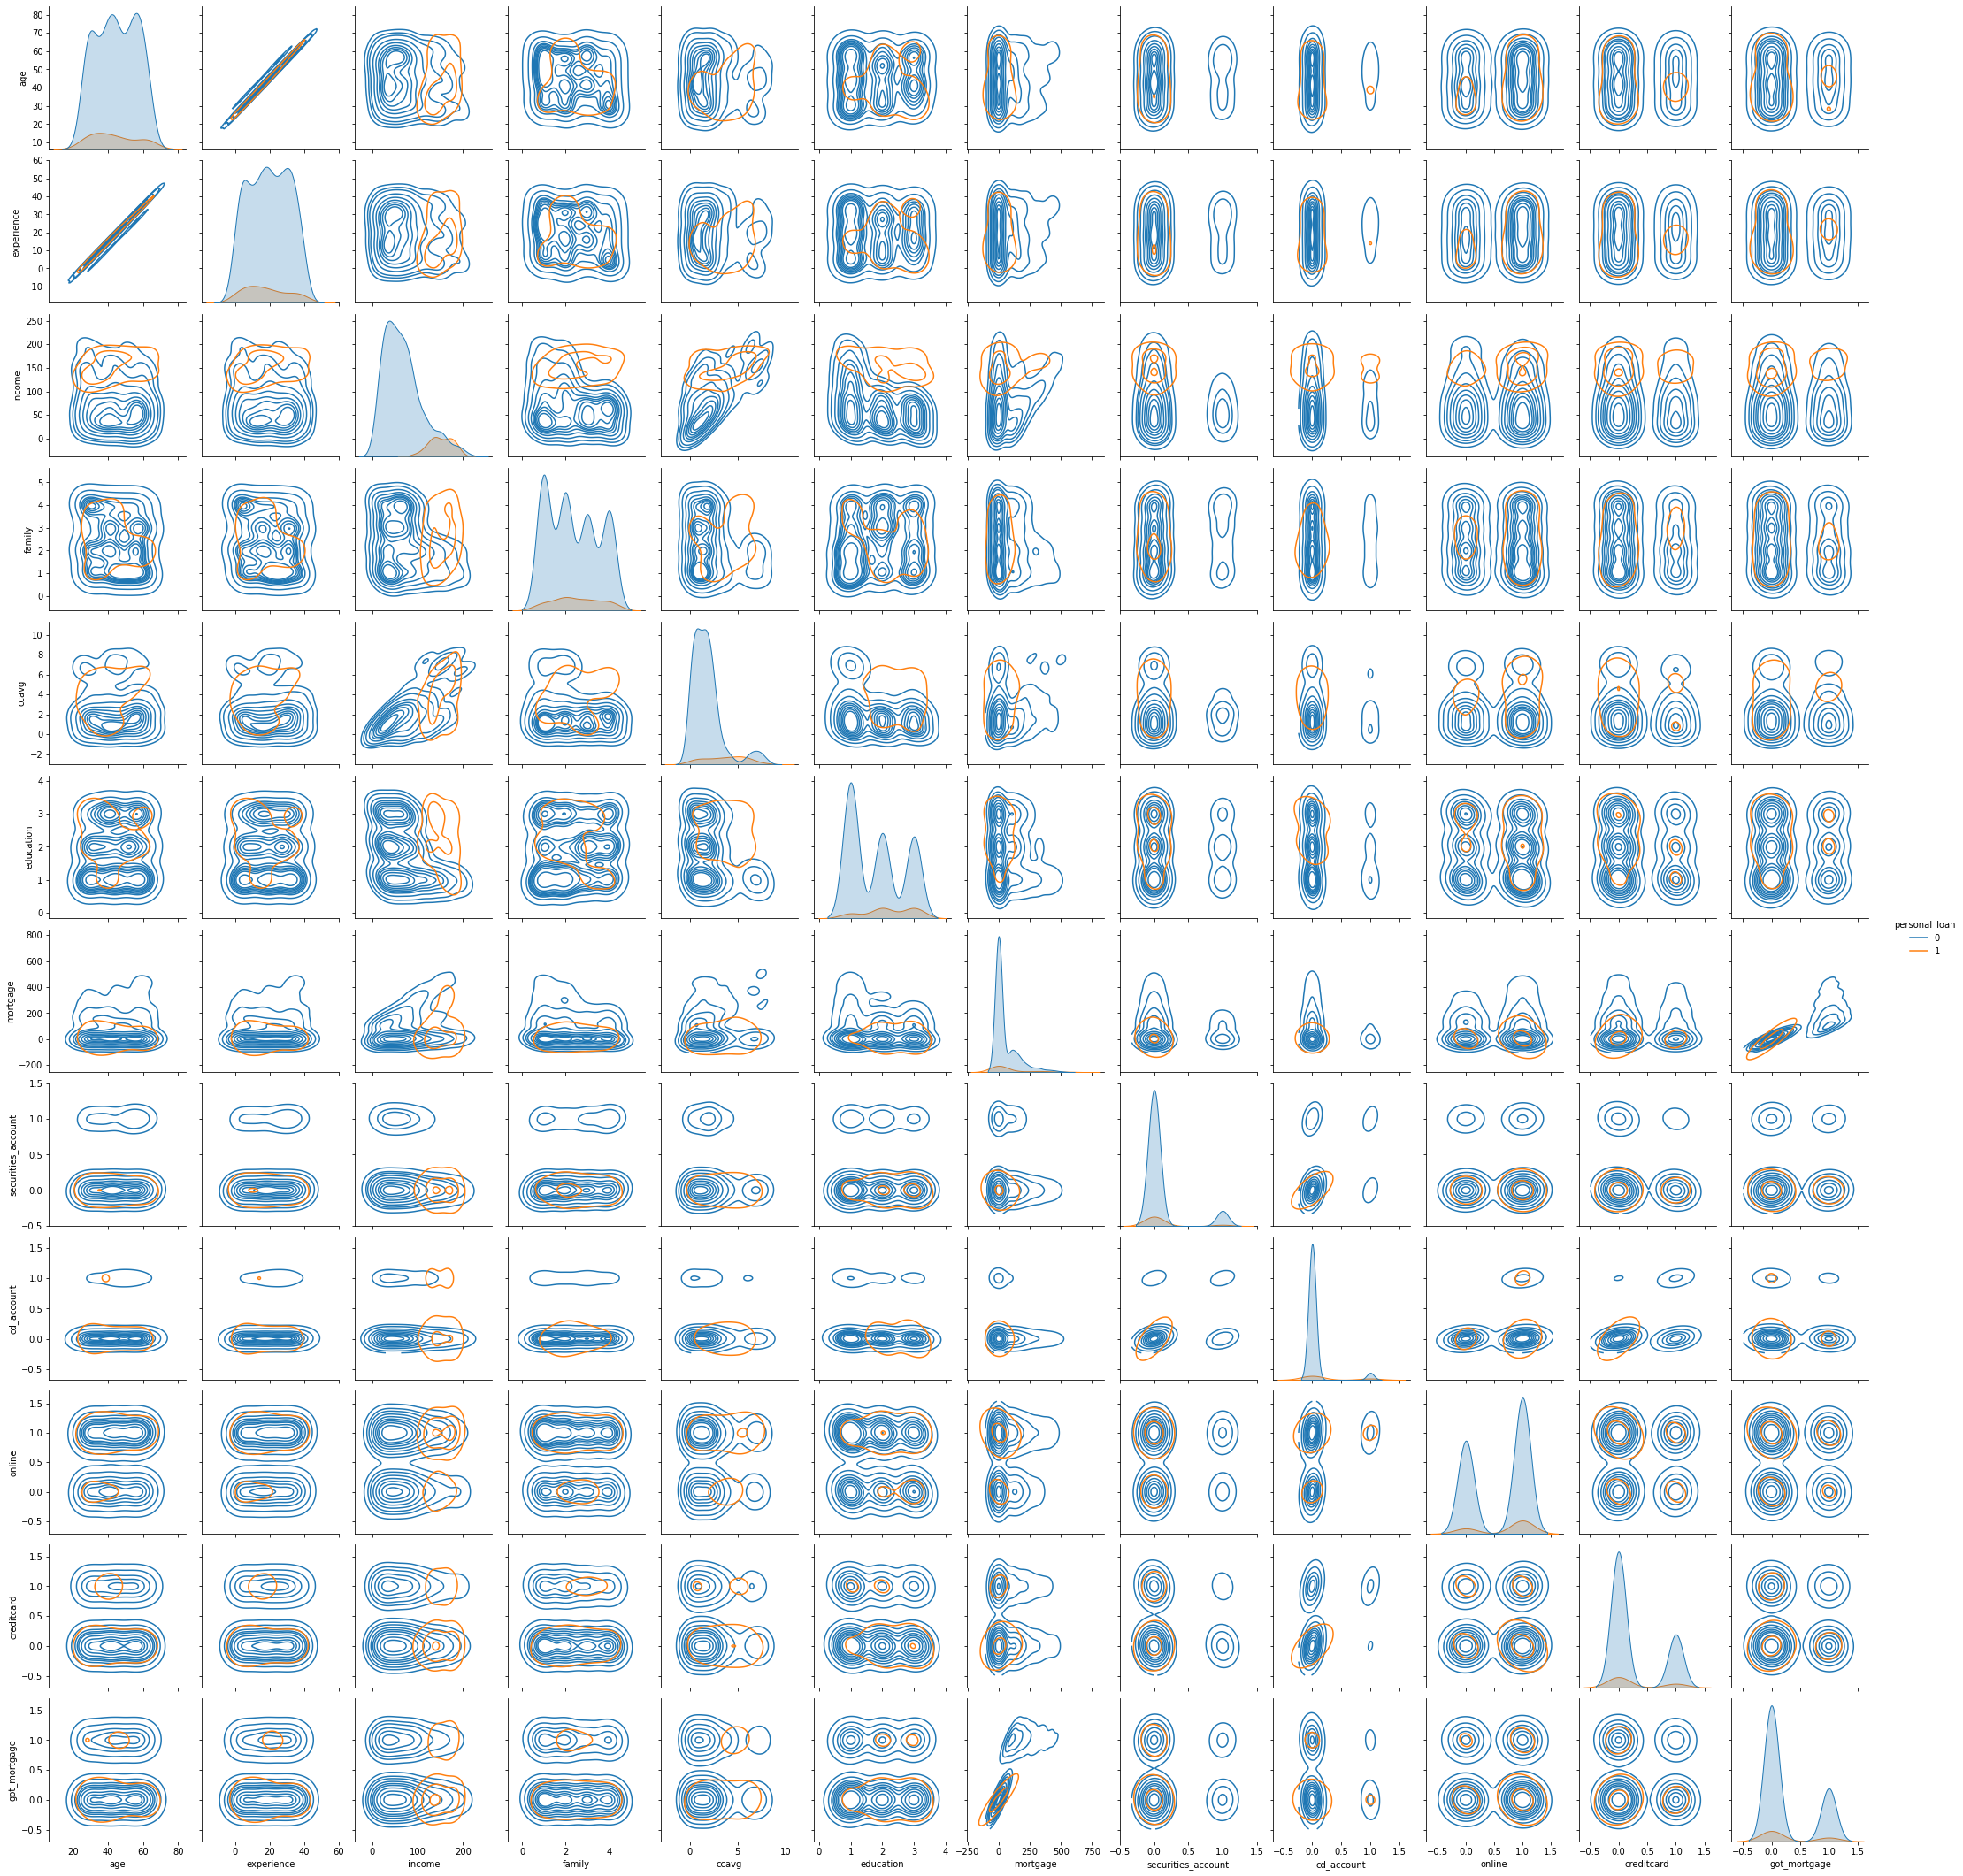

In [87]:
sns.pairplot(data.sample(500),kind="kde",hue="personal_loan")

People with higher Incomes have Personal Loans. THere seens to be a pattern with difference in the Income, Type of credits that the customer have and 

#### Definition of variable type

In [102]:
#Variable Creation
data["got_mortgage"] = np.where(data.mortgage == 0,1,0)
data["got_expenses"] = np.where(data.ccavg > 0,0,1)

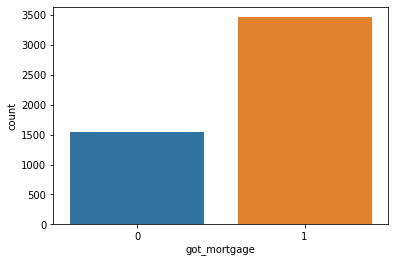

In [103]:
sns.countplot(x="got_mortgage",data=data)
plt.show()

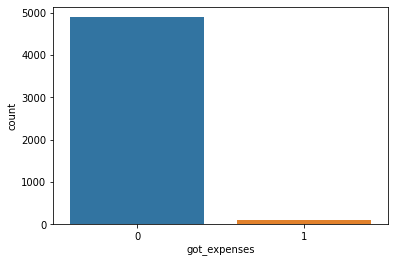

In [104]:
sns.countplot(x="got_expenses",data=data)
plt.show()

got Mortgage and got Expenses shows that not the many customer have Expenses in the ccavg and that Morgage there are some clients that doesn have this type of loan 

In [105]:
target = "personal_loan"

In [106]:
categorical_variables = np.array(data.drop(target,1).columns[data.drop(target,1).nunique().values <= 7])

In [107]:
numeric_variables = np.array(data.columns[data.nunique().values > 7])

In [108]:
data[categorical_variables].head()

,family,education,securities_account,cd_account,online,creditcard,zip2d,got_mortgage,got_expenses
0,4,1,1,0,0,0,91,1,0
1,3,1,1,0,0,0,90,1,0
2,1,1,0,0,0,0,94,1,0
3,1,2,0,0,0,0,94,1,0
4,4,2,0,0,0,1,91,1,0


In [109]:
data[numeric_variables].head()

,age,experience,income,ccavg,mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0
3,35,9,100,2.7,0
4,35,8,45,1.0,0


In [110]:
data[target].head()

0    0
1    0
2    0
3    0
4    0
Name: personal_loan, dtype: int64

## Data Pre processing

In [ ]:
categorical_encoder = {}

for name in categorical_variables:
    encoder = OneHotEncoder(handle_unknown='error',drop="first",sparse=False)
    encoder.fit(data.loc[:,[name]])
    categorical_encoder[name] = encoder

In [ ]:
features_list = []
features_list.append(data[numeric_variables])
for name in categorical_variables:
    encoder = categorical_encoder[name]
    columns_name = [x.replace("x0",name) for x in encoder.get_feature_names()]
    encoded = encoder.transform(data.loc[:,[name]])
    features = pd.DataFrame(encoded,columns=columns_name)
    features_list.append(features)

In [138]:
features = pd.concat(features_list,1)

In [139]:
scaler = MinMaxScaler()

In [140]:
X = scaler.fit_transform(features)

In [141]:
y = np.array(data[target])

In [187]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=1230)

## Modeling

In [188]:
model = LogisticRegression(n_jobs=8)

In [189]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=8, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
y_hat = model.predict(x_test)

In [196]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1347
           1       0.92      0.61      0.74       153

    accuracy                           0.96      1500
   macro avg       0.94      0.80      0.86      1500
weighted avg       0.95      0.96      0.95      1500



In [235]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = features.columns
coef_df['intercept'] = model.intercept_
coef_df.T.sort_values(by=0,ascending=False)

,0
income,8.96
cd_account_1,3.01
education_3,2.93
education_2,2.71
ccavg,1.93
family_3,1.18
family_4,0.98
mortgage,0.65
experience,0.40
zip2d_95,-0.02


## Model Evaluation

In [210]:
def logit_roc_auc(y_true,y_pred,y_proba):
    logit_roc_auc = roc_auc_score(y_true,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [214]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [209]:
y_proba = model.predict_proba(x_test)[:,1]

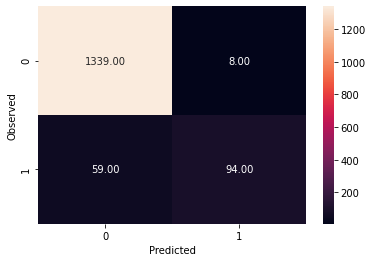

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1347
           1       0.92      0.61      0.74       153

    accuracy                           0.96      1500
   macro avg       0.94      0.80      0.86      1500
weighted avg       0.95      0.96      0.95      1500



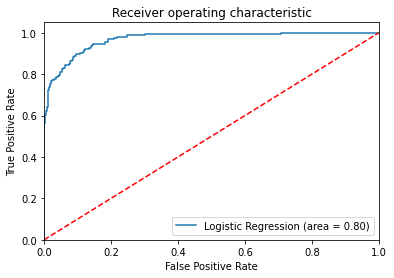

In [215]:
draw_cm(y_test,y_hat)
print(classification_report(y_test,y_hat))
logit_roc_auc(y_test,y_hat,y_proba)

In [222]:
info = data.copy()

In [226]:
info["prediction"] = model.predict(X)

In [230]:
info[(info.personal_loan==1)&(info.prediction==0)]

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,zip2d,got_mortgage,got_expenses,prediction
57,56,31,131,2,1.20,3,0,1,0,0,0,0,95,1,0,0
78,54,30,133,2,2.60,3,0,1,0,0,0,0,93,1,0,0
183,29,3,148,3,4.10,1,0,1,0,0,1,0,92,1,0,0
261,42,16,111,2,1.20,3,251,1,0,0,1,0,93,0,0,0
317,40,16,119,2,4.20,2,0,1,0,0,1,0,91,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705,61,37,141,3,0.70,1,0,1,0,1,1,1,92,1,0,0
4790,35,11,101,3,3.80,3,150,1,0,0,1,0,94,0,0,0
4811,36,12,123,2,3.00,3,0,1,0,0,0,0,90,1,0,0
4865,50,24,133,4,1.40,2,342,1,0,0,0,1,90,0,0,0


## Business Insights

1) there is a higher probability that a customer with high income with higher education and with a Liability account(CD) would take a personal Loan. (Given the Parameters, we cannot know how many contribute but we can know the impact that made)

2) Single families or with just recent married families have a propensity to take a loan when the family is growing. these can be seen in the Parameter 2,3 and 4 for families. More mature Families or with recent child have highers probability of take a loan

3)Credit car limited the probability of a person to take a new personal loan